# EDA

### Importación de librerias

In [3]:
import sys
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

### Establecimiento de la Conexión con MySQL

In [4]:
sys.path.append(os.path.abspath('../source'))

from connection_mysql import get_sqlalchemy_engine

conexion = get_sqlalchemy_engine()

Conexión a la base de datos exitosa.


### Consulta de Datos desde MySQL

In [5]:
df = pd.read_sql_query("SELECT * FROM raw_candidates", conexion)
print(df.head())

   First Name   Last Name                      Email Application Date  \
0  Bernadette   Langworth        leonard91@yahoo.com       2021-02-26   
1      Camryn    Reynolds        zelda56@hotmail.com       2021-09-09   
2       Larue      Spinka   okey_schultz41@gmail.com       2020-04-14   
3        Arch      Spinka     elvera_kulas@yahoo.com       2020-10-01   
4       Larue  Altenwerth  minnie.gislason@gmail.com       2020-05-20   

   Country  YOE  Seniority                         Technology  \
0   Norway    2     Intern                      Data Engineer   
1   Panama   10     Intern                      Data Engineer   
2  Belarus    4  Mid-Level                     Client Success   
3  Eritrea   25    Trainee                          QA Manual   
4  Myanmar   13  Mid-Level  Social Media Community Management   

   Code Challenge Score  Technical Interview Score  
0                     3                          3  
1                     2                         10  
2          

### Información del conjunto de datos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   First Name                 50000 non-null  object
 1   Last Name                  50000 non-null  object
 2   Email                      50000 non-null  object
 3   Application Date           50000 non-null  object
 4   Country                    50000 non-null  object
 5   YOE                        50000 non-null  int64 
 6   Seniority                  50000 non-null  object
 7   Technology                 50000 non-null  object
 8   Code Challenge Score       50000 non-null  int64 
 9   Technical Interview Score  50000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.8+ MB


El DataFrame contiene 50,000 registros y 10 columnas, sin valores nulos en ninguna de ellas, lo que indica que la base de datos está completa. En términos de tipos de datos, hay siete columnas categóricas (de tipo object) y tres numéricas (int64). Las columnas categóricas incluyen nombres, correos electrónicos, país, nivel de experiencia y tecnología, mientras que las numéricas corresponden a los años de experiencia y puntuaciones en evaluaciones técnicas.

### Valores Nulos

In [7]:
null_values= df.isnull().sum()
print("Valores nulos:\n", null_values)

Valores nulos:
 First Name                   0
Last Name                    0
Email                        0
Application Date             0
Country                      0
YOE                          0
Seniority                    0
Technology                   0
Code Challenge Score         0
Technical Interview Score    0
dtype: int64


Se verificó la existencia de valores nulos en la tabla. No se encontraron valores nulos en ninguna de las columnas, lo que indica que la base de datos está completa en cuanto a registros.



### Valores Duplicados

In [8]:
duplicate_values= df[df.duplicated(keep=False)]
print("Datos duplicados:\n", duplicate_values)

Datos duplicados:
 Empty DataFrame
Columns: [First Name, Last Name, Email, Application Date, Country, YOE, Seniority, Technology, Code Challenge Score, Technical Interview Score]
Index: []


No se encontraron registros completamente duplicados en la tabla.

In [9]:
for col in df.columns:
    print(f"Valores duplicados en '{col}':")
    print(df[col].value_counts()[df[col].value_counts() > 1])
    print("-" * 40)

Valores duplicados en 'First Name':
First Name
Sarai        33
Elyse        32
Anabel       31
Eva          31
Nayeli       30
             ..
Janis         6
Jaydon        6
Paul          5
Antonetta     5
Gudrun        5
Name: count, Length: 3007, dtype: int64
----------------------------------------
Valores duplicados en 'Last Name':
Last Name
Murazik       138
Nitzsche      134
Harvey        133
Metz          133
Lang          133
             ... 
Rutherford     83
Howe           82
White          79
McClure        78
Bechtelar      76
Name: count, Length: 474, dtype: int64
----------------------------------------
Valores duplicados en 'Email':
Email
marianne31@yahoo.com        3
fern70@gmail.com            3
isaiah24@yahoo.com          2
missouri65@yahoo.com        2
kelton91@hotmail.com        2
                           ..
marjolaine91@hotmail.com    2
jazmin54@gmail.com          2
reyna2@hotmail.com          2
kasandra68@hotmail.com      2
easter75@gmail.com          2
Name: 

Se identificaron valores repetidos en las siguientes columnas: First Name, Last Name, Email, Application Date, Country, YOE (Años de Experiencia), Seniority, Technology, Code Challenge Score, Technical Interview Score
La duplicación en estos datos es normal y esperable, ya que refleja patrones comunes en conjuntos de datos grandes, como nombres repetidos, concentración geográfica, niveles de experiencia similares y tecnologías populares. Sin embargo, los correos deberian ser unicos.

In [10]:
duplicated_personal_data= df[df.duplicated(subset=['Email', 'First Name', 'Last Name'], keep=False)]
print("Datos Personales Duplicados:\n", duplicated_personal_data)

Datos Personales Duplicados:
 Empty DataFrame
Columns: [First Name, Last Name, Email, Application Date, Country, YOE, Seniority, Technology, Code Challenge Score, Technical Interview Score]
Index: []


El resultado que muestras indica que no hay datos personales duplicados en el DataFrame cuando se consideran las columnas Email, First Name y Last Name de manera conjunta. Esto significa que no existen filas donde la combinación de estas tres columnas se repita. Por lo se podria inferir que no se trata de una misma persona que aplico en multiples ocasiones sino de diferentes personas con un mismo correo. 

### Verificación de Correos Electrónicos

In [11]:

# Expresión regular para validar correos electrónicos
email_regex = r"^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$"

# Filtrar los correos inválidos sin modificar el DataFrame
invalid_emails = df.loc[~df["Email"].str.match(email_regex), "Email"]

# Mostrar la cantidad y algunos ejemplos de correos inválidos
print(f"Correos inválidos encontrados: {len(invalid_emails)}")
print(invalid_emails.head(10)) 

Correos inválidos encontrados: 0
Series([], Name: Email, dtype: object)


Se utilizó una expresión regular (regex) para validar la estructura de los correos electrónicos. No se encontraron correos con formatos incorrectos, lo que sugiere que los datos de contacto de los candidatos son válidos.

### Análisis numérico de los datos 

In [12]:

df['Application Date'] = pd.to_datetime(df['Application Date'])

In [13]:
df.describe()

,Application Date,YOE,Code Challenge Score,Technical Interview Score
count,50000,50000.000000,50000.000000,50000.000000
mean,2020-04-03 23:04:14.592000,15.286980,4.996400,5.003880
min,2018-01-01 00:00:00,0.000000,0.000000,0.000000
25%,2019-02-17 00:00:00,8.000000,2.000000,2.000000
50%,2020-04-06 00:00:00,15.000000,5.000000,5.000000
75%,2021-05-21 00:00:00,23.000000,8.000000,8.000000
max,2022-07-04 00:00:00,30.000000,10.000000,10.000000
std,NaN,8.830652,3.166896,3.165082


El análisis de df.describe() muestra que la fecha de aplicación de los candidatos varía entre el 1 de enero de 2018 y el 4 de julio de 2022, lo que nos indica que en el 2022 los datos tienen una reducción ya que no se registro el año completo. La mediana de las aplicaciones es el 6 de abril de 2020, lo que indica que la mayoría de los candidatos aplicaron alrededor de esa fecha. 
los aplicantes tienen un rango amplio de años de experiencia (YOE), desde 0 hasta 30 años, con una media de ~15 años y una distribución simétrica. 
Los puntajes del desafío de código y la entrevista técnica tienen un rango de 0 a 10, con medias cercanas a 5 y una distribución uniforme, donde la mayoría de los aplicantes obtuvieron entre 2 y 8 puntos. 

### Mapa de correlación

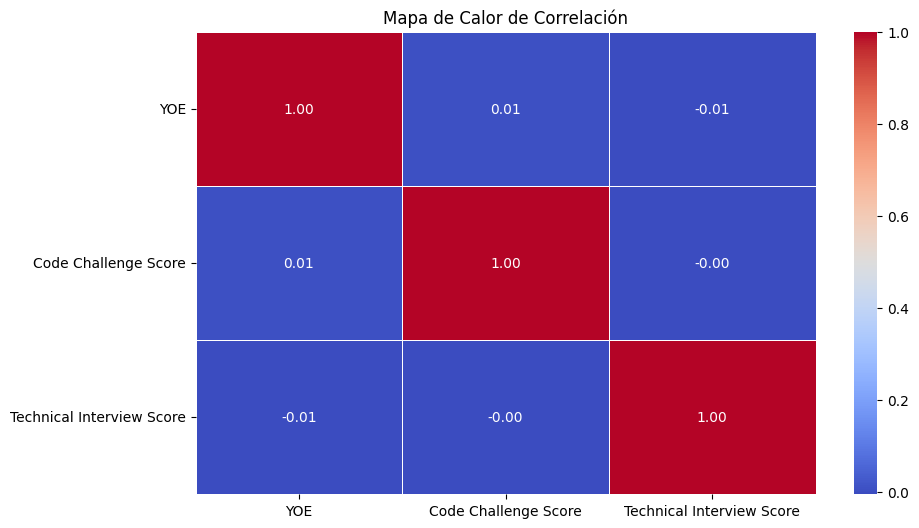

In [14]:
df_numeric = df.select_dtypes(include=['number'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de Correlación")
plt.show()


El mapa de calor de correlación muestra la relación entre los años de experiencia (YOE), el puntaje del Code Challenge y el puntaje de la entrevista técnica. En este mapa, los valores están cercanos a 0, lo que indica que no hay una correlación significativa entre estas variables. Esto sugiere que el desempeño en los desafíos de código y entrevistas técnicas no está relacionado con la experiencia en años.

### Histograma de los puntajes

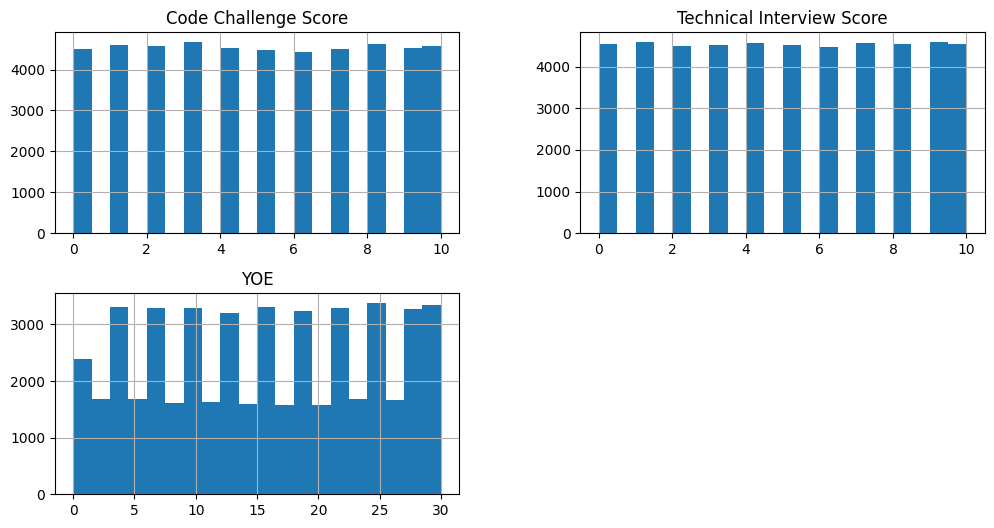

In [ ]:

df[['Code Challenge Score', 'Technical Interview Score', 'YOE']].hist(figsize=(12, 6), bins=20)
plt.show()

Los gráficos representan distribuciones de los puntajes del Code Challenge, de la entrevista técnica y los años de experiencia. Se observa que los puntajes del Code Challenge y de la entrevista técnica tienen distribuciones bastante uniformes, lo que implica que los candidatos se distribuyen de manera homogénea en todos los puntajes posibles, sin una tendencia clara hacia valores altos o bajos. Por otro lado, los años de experiencia muestran una mayor concentración en los extremos, especialmente en valores bajos y en 30 años, lo que sugiere que hay candidatos con muy poca o con mucha experiencia, pero menos en el rango intermedio.

### Boxplot para detectar valores atípicos en los puntajes y experiencia

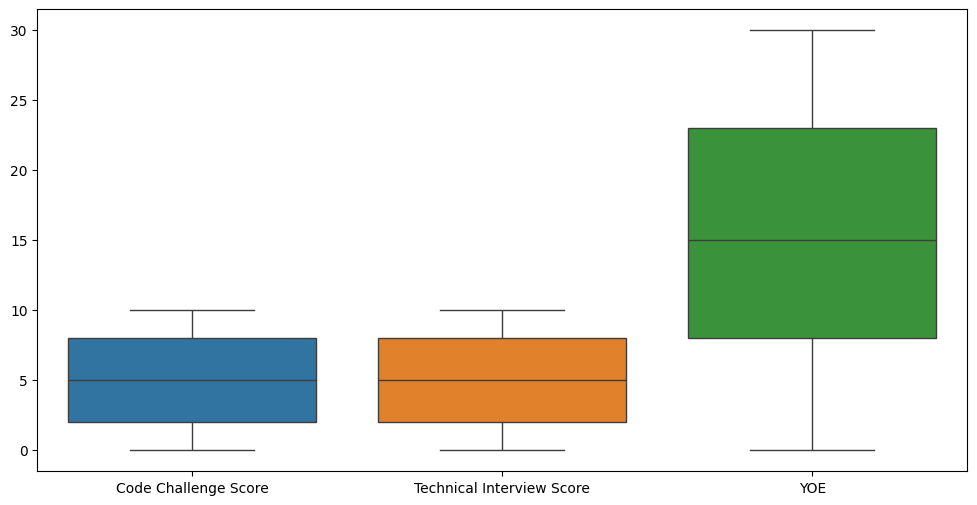

In [ ]:

plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Code Challenge Score', 'Technical Interview Score', 'YOE']])
plt.show()


El boxplot muestra que no existen valores atípicos en ninguno de los campos. Se observa que los puntajes del reto de código y de la entrevista técnica tienen distribuciones similares, con medianas en torno a los 5 y 6 puntos respectivamente. Los valores mínimos están cerca de 0 y los máximos alrededor de 10, lo que indica que algunos candidatos obtuvieron calificaciones muy bajas mientras que otros alcanzaron el puntaje máximo. En contraste, los años de experiencia presentan una mayor variabilidad, con un rango que va desde 0 hasta 30 años. La mediana de este grupo se encuentra aproximadamente en los 15 años, lo que sugiere que la mayoría de los candidatos tienen una experiencia laboral considerable.
 

### Obtener conteo de contratados y no contratados

In [ ]:

hired= (df["Code Challenge Score"] >= 7) & (df["Technical Interview Score"] >= 7)

hired_count = hired.sum()
not_hired_count = (~hired).sum()

print("Empleados contratados:\n", hired_count)
print("Empleados no contratados:\n", not_hired_count)

Empleados contratados:
 6698
Empleados no contratados:
 43302


El número de empleados contratados es significativamente menor en comparación con los que no fueron seleccionados. De un total de 50,000 candidatos, solo 6,698 fueron contratados, lo que representa aproximadamente el 13.4% del total. Esto sugiere que el proceso de selección es altamente competitivo y que la mayoría de los aspirantes no lograron cumplir con los criterios establecidos.

### Conteo de contrataciones por país

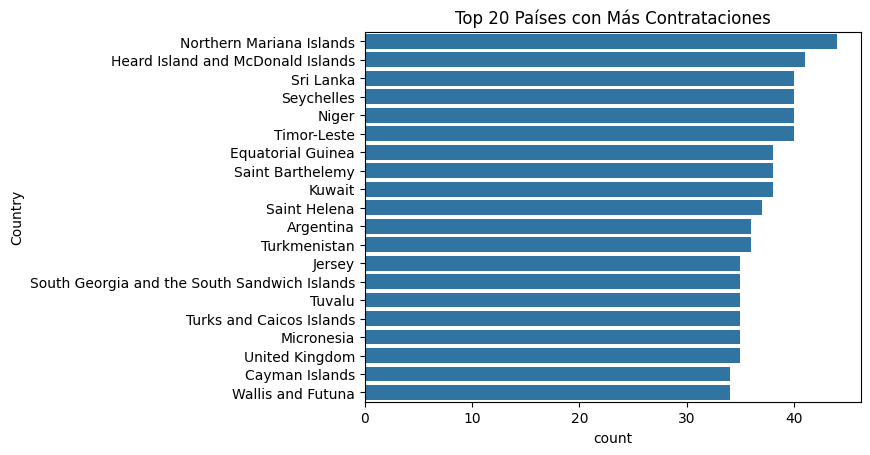

In [ ]:

hired_by_country = df[hired]["Country"].value_counts().head(20)

sns.countplot(data=df[hired], y="Country", order=hired_by_country.index)
plt.title("Top 20 Países con Más Contrataciones")
plt.show()


El gráfico de barras revela que los países con mayor número de empleados contratados incluyen las Islas Marianas del Norte, la Isla Heard y las Islas McDonald, Sri Lanka, Seychelles y Níger, entre otros. Esto sugiere que en estos países existen oportunidades laborales más accesibles o que la oferta de candidatos calificados es mayor en comparación con otras regiones.

### Relación entre Años de Experiencia y Contratación

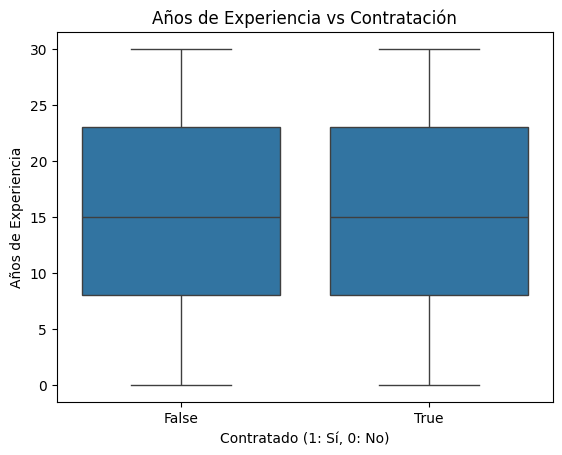

In [ ]:
sns.boxplot(data=df, x=hired, y="YOE")
plt.title("Años de Experiencia vs Contratación")
plt.xlabel("Contratado (1: Sí, 0: No)")
plt.ylabel("Años de Experiencia")
plt.show()


El diagrama de cajas que relaciona los años de experiencia con la contratación muestra que no hay una diferencia significativa en la mediana de años de experiencia entre los contratados y los no contratados. Esto implica que la experiencia laboral por sí sola no es un factor determinante en el proceso de contratación.